## Data 780 - Final Project

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the initial process of investigating the dataset to find patterns, spot anomalies, and summarize main characteristics. It is crucial to understand the data's features, relationships, and to identify errors before formal modeling.

In [20]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Unzip the datasets
files = ['reddit_data.csv.zip', 'kaggle_data.csv.zip']

for file in files:

    zip_file_path = f'data/{file}'
    extract_to_path = 'data/'

    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zf:
            zf.extractall(path=extract_to_path)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_to_path}'.")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid ZIP file.")
    except FileNotFoundError:
        print(f"Error: ZIP file not found at '{zip_file_path}'.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

Successfully extracted 'data/reddit_data.csv.zip' to 'data/'.
Successfully extracted 'data/kaggle_data.csv.zip' to 'data/'.


In [25]:
# Read in Reddit data
reddit_df = pd.read_csv('data/reddit_data.csv')

In [13]:
reddit_df.head()

,body,ISTJ,ISFJ,INFJ,INTJ,ISTP,ISFP,INFP,INTP,ENTJ,...,ESFP,class,Introvert,Extrovert,Sensing,Intuition,Thinking,Feeling,Judging,Perceiving
0,"['knowing', 'youre', 'tool', 'use', 'interacti...",0,0,0,1,0,0,0,0,0,...,0,INTJ,1,0,0,1,1,0,1,0
1,"['truly', 'enlightened', 'mastermind']",0,0,0,1,0,0,0,0,0,...,0,INTJ,1,0,0,1,1,0,1,0
2,"['help', 'moment', 'hobby', 'keep', 'mind', 'b...",0,0,1,0,0,0,0,0,0,...,0,INFJ,1,0,0,1,0,1,1,0
3,"['watch', 'bit', 'everything', 'including', 'h...",0,0,0,0,0,0,0,1,0,...,0,INTP,1,0,0,1,1,0,0,1
4,"['dont', 'know', 'would', 'count', 'pet', 'pee...",0,0,0,1,0,0,0,0,0,...,0,INTJ,1,0,0,1,1,0,1,0


In [14]:
# Dataframe columns
reddit_df.columns

Index(['body', 'ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP',
       'ENTJ', 'ENTP', 'ENFJ', 'ENFP', 'ESTJ', 'ESFJ', 'ESTP', 'ESFP', 'class',
       'Introvert', 'Extrovert', 'Sensing', 'Intuition', 'Thinking', 'Feeling',
       'Judging', 'Perceiving'],
      dtype='object')

In [15]:
# Shape of the DataFrame
print('Shape:', reddit_df.shape)

Shape: (1651100, 26)


In [16]:
# Data types and non-null counts
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651100 entries, 0 to 1651099
Data columns (total 26 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   body        1651100 non-null  object
 1   ISTJ        1651100 non-null  int64 
 2   ISFJ        1651100 non-null  int64 
 3   INFJ        1651100 non-null  int64 
 4   INTJ        1651100 non-null  int64 
 5   ISTP        1651100 non-null  int64 
 6   ISFP        1651100 non-null  int64 
 7   INFP        1651100 non-null  int64 
 8   INTP        1651100 non-null  int64 
 9   ENTJ        1651100 non-null  int64 
 10  ENTP        1651100 non-null  int64 
 11  ENFJ        1651100 non-null  int64 
 12  ENFP        1651100 non-null  int64 
 13  ESTJ        1651100 non-null  int64 
 14  ESFJ        1651100 non-null  int64 
 15  ESTP        1651100 non-null  int64 
 16  ESFP        1651100 non-null  int64 
 17  class       1651100 non-null  object
 18  Introvert   1651100 non-null  int64 
 19  

In [17]:
# Check for missing values
print('Missing values per column:')
print(reddit_df.isnull().sum())

Missing values per column:
body          0
ISTJ          0
ISFJ          0
INFJ          0
INTJ          0
ISTP          0
ISFP          0
INFP          0
INTP          0
ENTJ          0
ENTP          0
ENFJ          0
ENFP          0
ESTJ          0
ESFJ          0
ESTP          0
ESFP          0
class         0
Introvert     0
Extrovert     0
Sensing       0
Intuition     0
Thinking      0
Feeling       0
Judging       0
Perceiving    0
dtype: int64


In [18]:
# Combine all 'body' rows by 'class' and show most common words for each class
from collections import Counter
import re
import pprint

# Group by 'class' and concatenate all 'body' text
grouped = reddit_df.groupby('class')['body'].apply(lambda texts: ' '.join(str(t) for t in texts))

# For each class, tokenize and count most common words
common_words = {}
for classes, bodies in grouped.items():
    # Basic tokenization: lowercase, remove non-alphabetic, split
    words = re.findall(r'\b[a-z]{3,}\b', bodies.lower())

    # Get the top 10 most common words
    word_counts = Counter(words)

    word_list = []
    for word, count in word_counts.most_common(10):
        word_list.append((word, count))
    common_words[classes] = word_list

pprint.pprint(common_words)


{'ENFJ': [('like', 8472),
          ('people', 7669),
          ('dont', 6317),
          ('think', 5753),
          ('thing', 5032),
          ('really', 4510),
          ('know', 4461),
          ('would', 4372),
          ('feel', 4313),
          ('get', 4223)],
 'ENFP': [('like', 36688),
          ('people', 28636),
          ('dont', 25568),
          ('thing', 22476),
          ('think', 21435),
          ('get', 20936),
          ('time', 19358),
          ('really', 18691),
          ('one', 18564),
          ('know', 17883)],
 'ENTJ': [('like', 13885),
          ('people', 12396),
          ('dont', 11241),
          ('think', 8737),
          ('get', 8300),
          ('thing', 8218),
          ('one', 7858),
          ('would', 7790),
          ('time', 7313),
          ('know', 6819)],
 'ENTP': [('like', 62636),
          ('people', 51907),
          ('dont', 48622),
          ('think', 43642),
          ('thing', 37855),
          ('get', 34792),
          ('one', 33768),


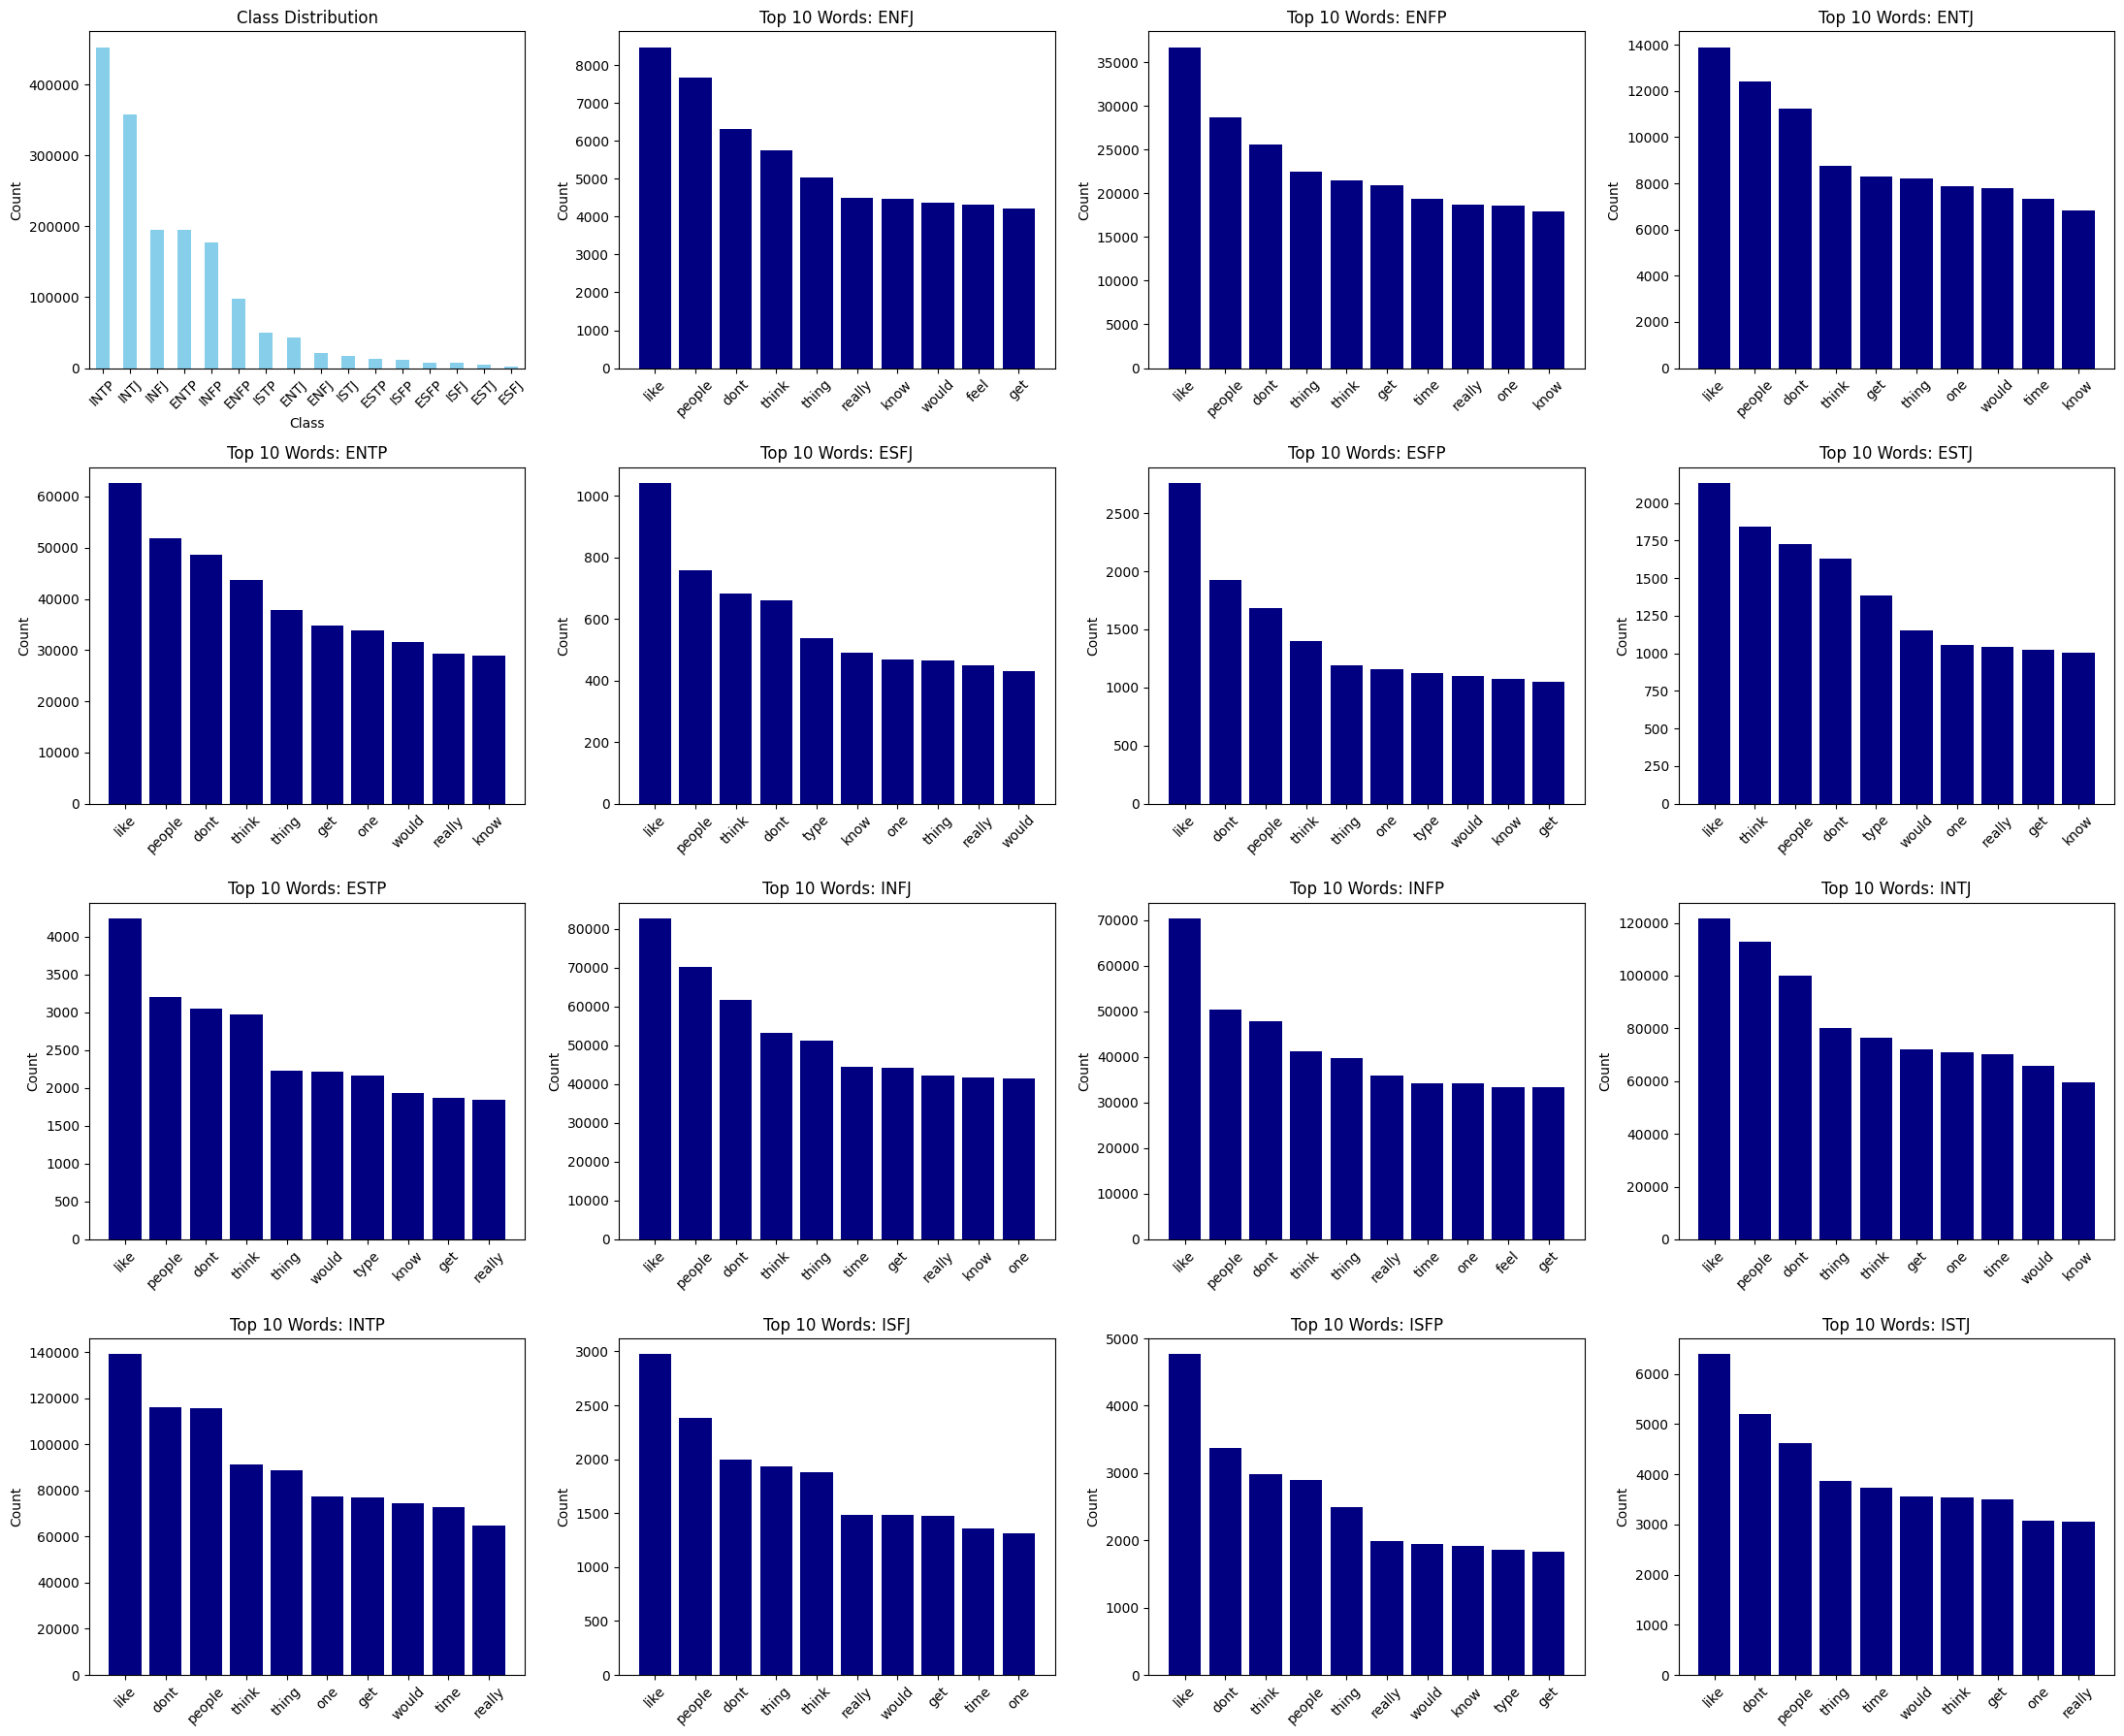

<Figure size 640x480 with 0 Axes>

In [19]:
# Visualization of class distribution and top words per class
class_labels = list(grouped.index)
n_classes = len(class_labels)
n_plots = min(15, n_classes)  # up to 15 classes for 4x4 grid (1 plot for class dist)
fig, axes = plt.subplots(4, 4, figsize=(22, 18))
axes = axes.flatten()

# Plot class distribution
reddit_df['class'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot top 10 words for each class
for i, class_name in enumerate(class_labels[:15]):
    words, counts = zip(*common_words[class_name])
    axes[i+1].bar(words, counts, color='navy')
    axes[i+1].set_title(f"Top 10 Words: {class_name}")
    axes[i+1].tick_params(axis='x', rotation=45)
    axes[i+1].set_ylabel('Count')

plt.tight_layout()
plt.show()
plt.savefig('images/class_word_distribution.png')

## Analysis Notes

The bar charts above show an imbalance in the representation of the different MBTI classes with a majority of the "Introverted" classes occurring more in the data than "Extroverted" datasets. This could affect the accuracys of any models built off of this dataset as those classes will have more data to train the models on. Additionally, the top word counts show that the various classes share a majority of the most commonly occuring words, this may also make model development difficult due to the similaritys of the information shared by the groups.

In [28]:
# Delete the extracted CSV file(s) to clean up

for file in files:
    filename = file.replace('.zip', '')

    try:
        os.remove(f'data/{filename}')
        print("Removed file:", filename)
    except FileNotFoundError:
        print("Error: Count not find file to remove:", filename)

Removed file: reddit_data.csv
Removed file: kaggle_data.csv
